# Задание

In [1]:
import pandas as pd 
data = pd.read_csv('https://files.sberdisk.ru/s/awZHYxiQdwj2JZ1/kaggle_survey_2022_responses.csv', low_memory=False)


## Задание 1

Используя библиотеку matplotlib, построй круговую диаграмму (Pie plot) для возраста респондента.

In [2]:
pd.__version__

'2.0.1'

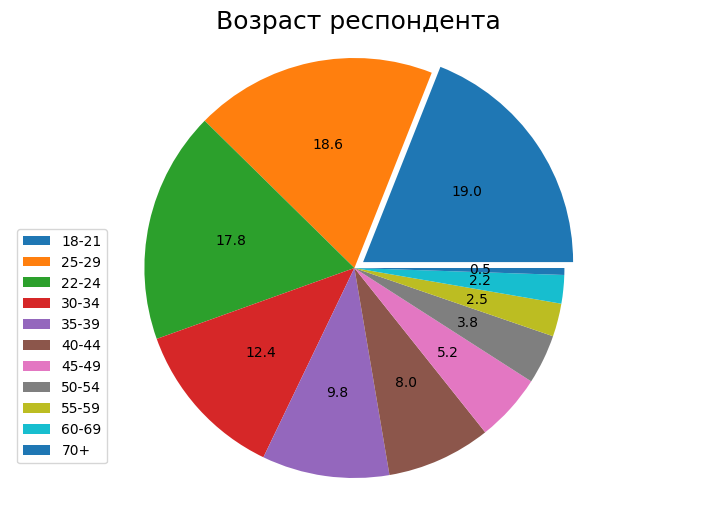

In [117]:
# Код тут
import pandas as pd 
import matplotlib.pyplot as plt


data = pd.read_csv('kaggle_survey_2022_responses.csv', keep_default_na=False, low_memory=False) #Учитываем данные

fd=data.drop(index=0)  # Удаляем строку с вопросами
fd1=fd['Q2'].value_counts()        # Подсчитывает частоту уникальных значений в колонке

DtPie = pd.DataFrame(fd1)
DtPie=DtPie.reset_index()

labels = DtPie['Q2']
sizes=DtPie['count']


#****************************************************
plt.rcParams['font.size'] = '10'
fig, ax = plt.subplots(figsize=(9, 6)) #Функция subplots() возвращает объект Figure и объект Axes
#colors = sns.color_palette('tab10') # задаем цветовую палитру (яркая)
ax.pie(sizes ,autopct='%.1f', explode=(0.05, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0))  # , colors = colors,counterclock=False


ax.legend(labels, loc='upper left', bbox_to_anchor=(0, 0.6),fontsize=10)
ax.set_title("Возраст респондента",size=18)

ax.axis("equal") #для пропорций

plt.show()



## Задание 2

Используя библиотеку seaborn, построй столбцовую диаграмму (Bar plot) по популярности библиотек для визуализации. \
Отсортируй библиотеки по уменьшению популярности. Используй цветовую палитру 'colorblind'.

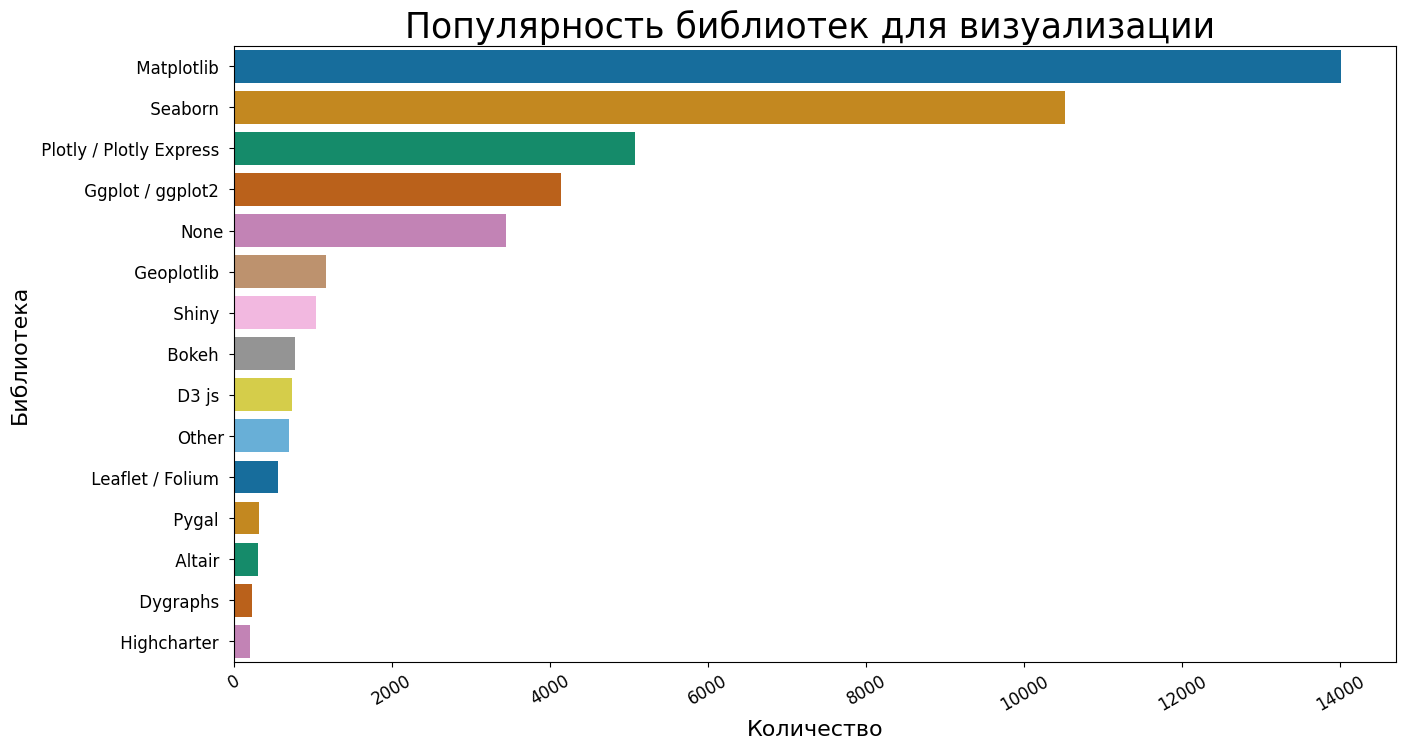

In [197]:
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('kaggle_survey_2022_responses.csv', keep_default_na=False, low_memory=False)

# Подготовка данных для визуализации
q15_columns = []
q15_columns = [col for col in data.columns if col.startswith('Q15')] # Выделаем вопросы с платформам.
                                                                    #Если строка начинается с Q15.То добавляем её в список
pltfs_15 = fd [q15_columns].melt(var_name='вопрос', value_vars=q15_columns)  

df=pltfs_15['value'].value_counts() #Сводка данных для презентации-визуализации

df_plt=pd.DataFrame(df)        # Сводная таблица данных

df_plt.drop([''], axis=0, inplace=True)

#df_plt

# Визуализация данных
df_plt=df_plt.reset_index()
df_plt.columns=['Библиотека','Количество']
plt.figure(figsize=(15,8))
plt.title('Популярность библиотек для визуализации ',fontsize=25)

import seaborn as sns
sns.barplot(y = 'Библиотека', x='Количество',data = df_plt,palette='colorblind')

plt.ylabel('Библиотека', fontsize=16)
plt.xlabel('Количество', fontsize=16)

plt.xticks(rotation=30,fontsize=12)
plt.yticks(fontsize=12)

#sns.set_theme(style='white') 
plt.show()

## Задание 3

Используя библиотеку seaborn, построй диаграмму "Ящик с усами" (Box plot) заработка по различным специальностям. \
Отсортируй специальности по убыванию медианы заработка. Используй цветовую палитру 'colorblind'

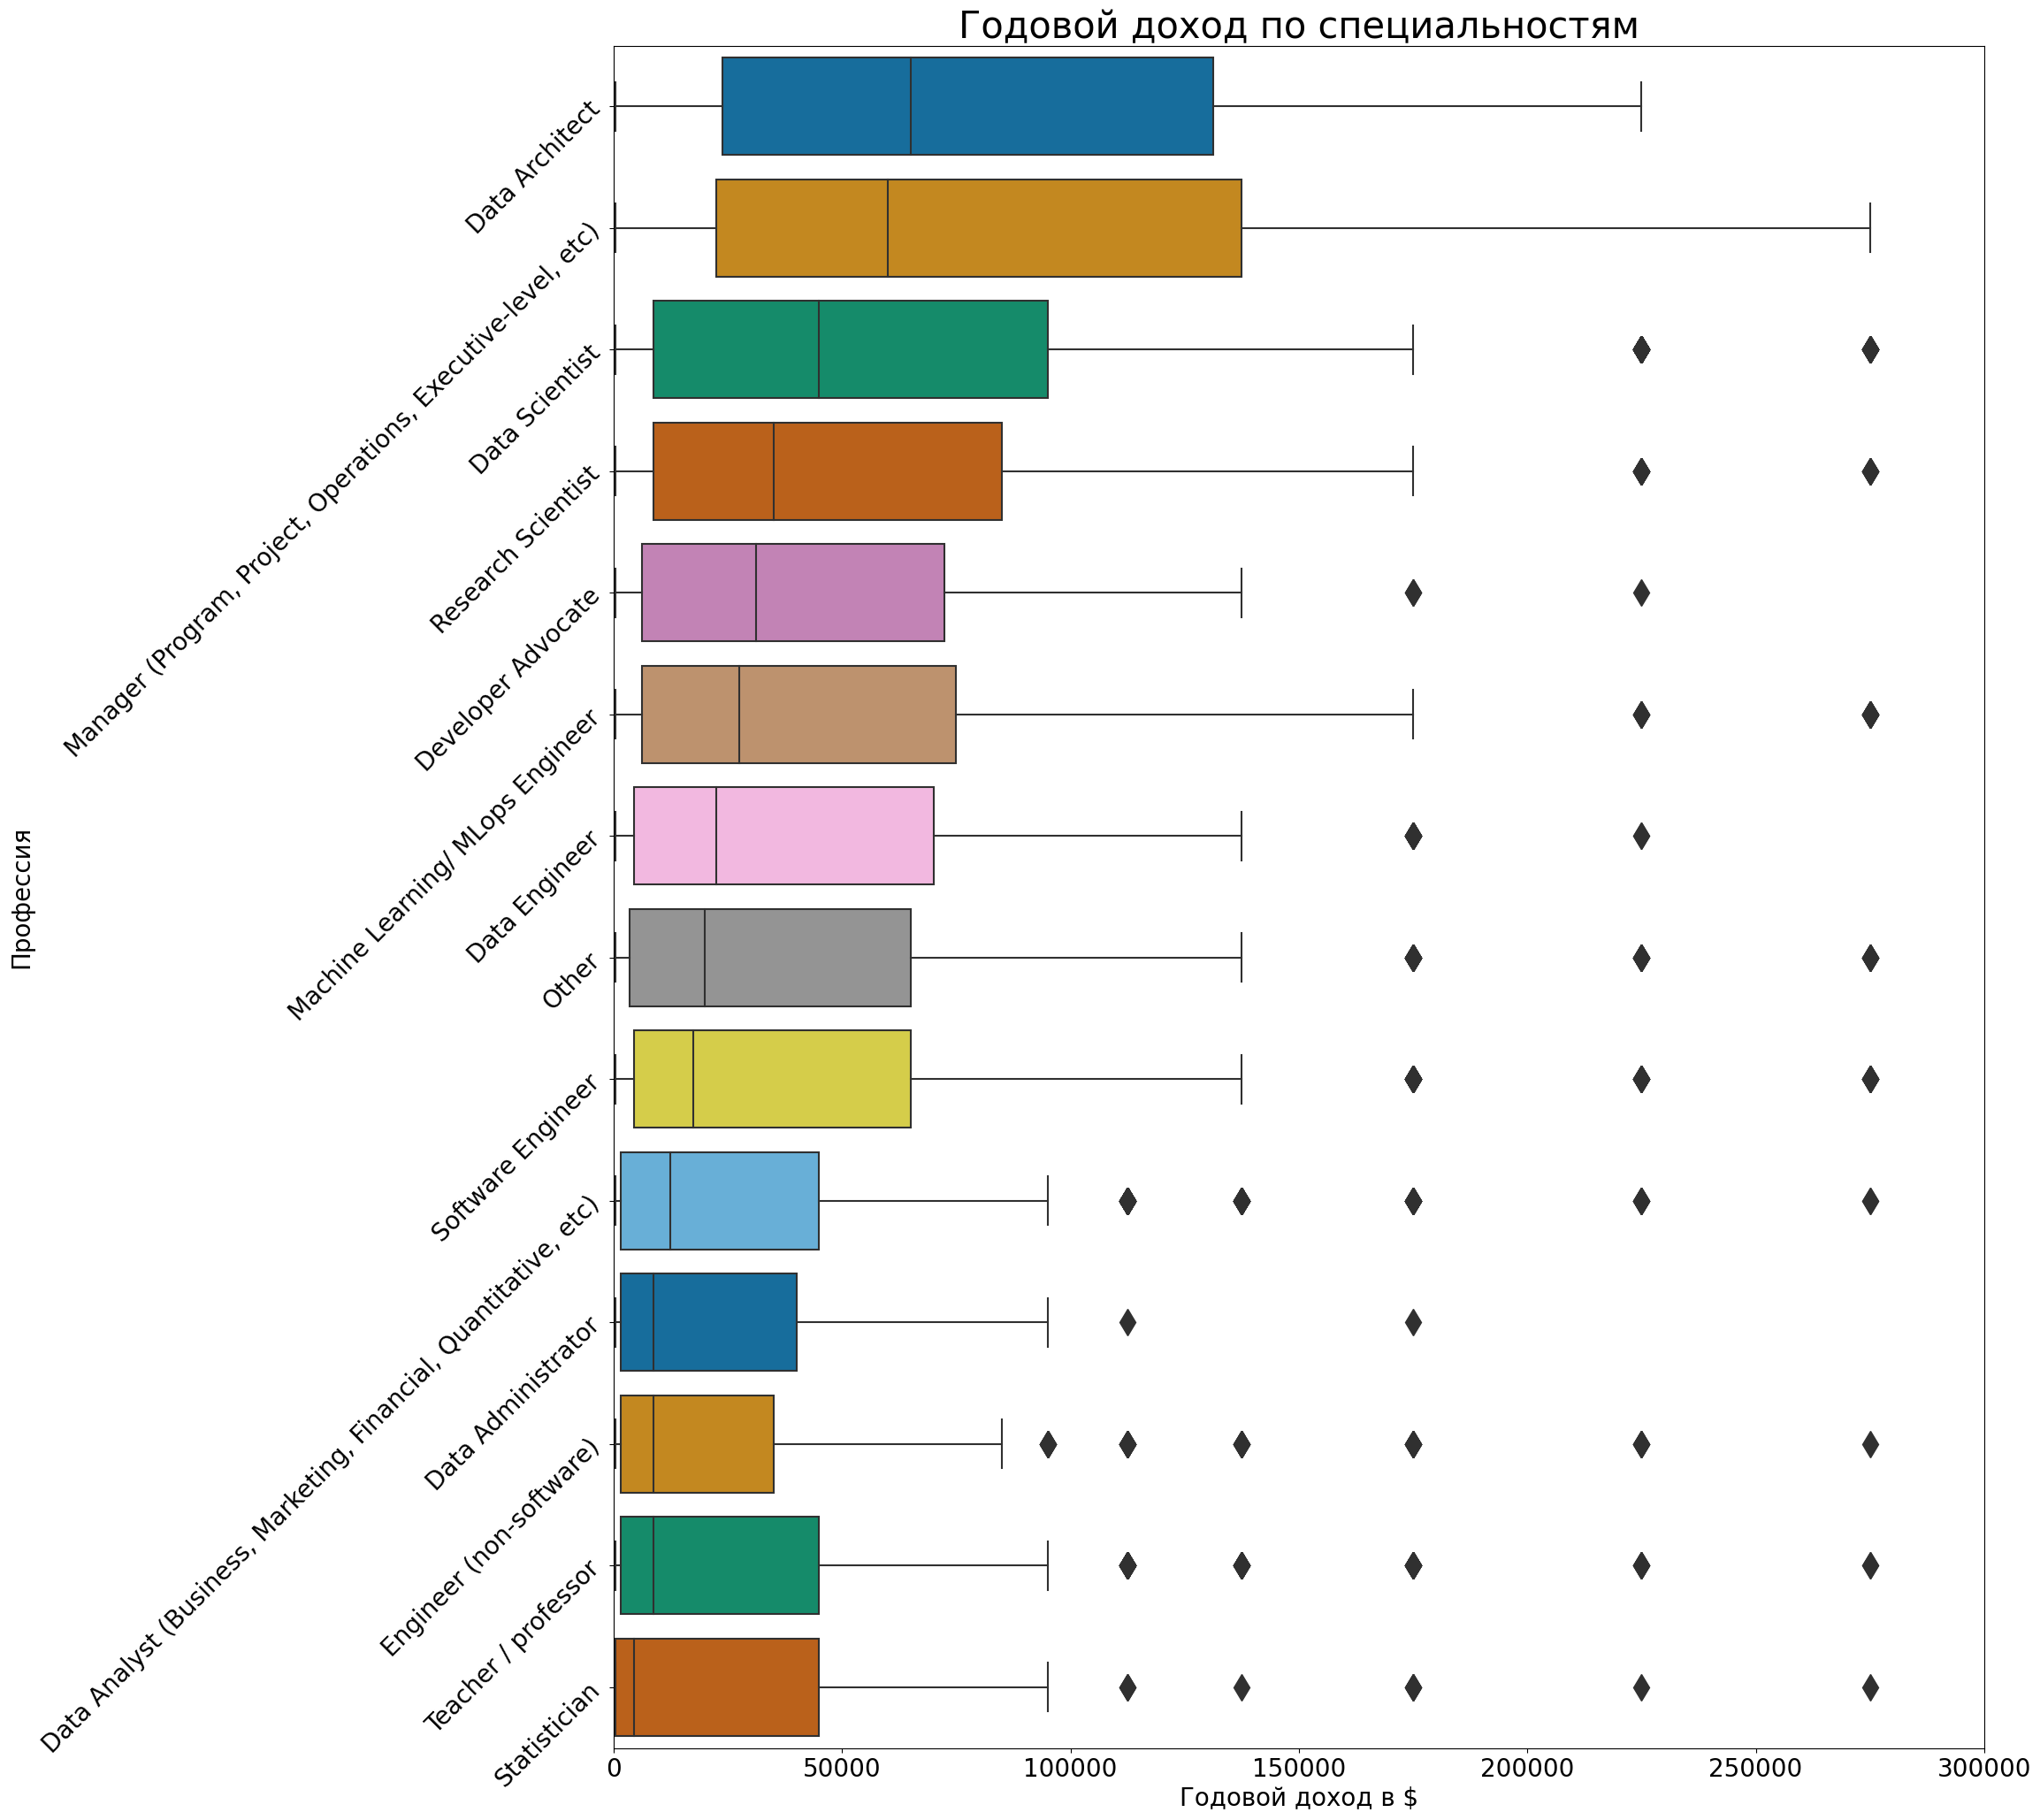

In [7]:
# Код тут
# Подготовка данных . Пользуемся кодом из Project 02
Salary_mapping =  {'$0-999':500,        
                '10,000-14,999':12500,
                '30,000-39,999':35000,                                                    
                '1,000-1,999':1500,                                                      
                '40,000-49,999':45000,                                               
                '100,000-124,999':112500, 
                '5,000-7,499':6250,  
                '50,000-59,999':55000, 
                '7,500-9,999':8750,  
                '150,000-199,999':175000,  
                '20,000-24,999':22500,                                                   
                '60,000-69,999':65000,                                                    
                '15,000-19,999':17500,                                                
                '70,000-79,999':75000,                                             
                '25,000-29,999':27500,                                           
                '2,000-2,999':2500,                                                  
                '125,000-149,999':137500,                                               
                '3,000-3,999':3500,                                               
                '4,000-4,999':4500,                                                    
                '80,000-89,999':85000,                                                  
                '90,000-99,999':95000,                                                 
                '200,000-249,999':225000,                                            
                '250,000-299,999':275000,                                               
                '300,000-499,999':400000,                                               
                '$500,000-999,999':750000,                                                 
                '>$1,000,000':1000000}  
data['Q29-NEW'] = data['Q29'].map(Salary_mapping)

df = pd.DataFrame(data[['Q23', 'Q29-NEW']].dropna())
df.columns= ['Профессия','Годовой доход в $']
median = df.groupby('Профессия').agg('median').sort_values(by='Годовой доход в $', ascending=False)

# print (df)
# print (median)
import seaborn as sns
fig, ax = plt.subplots(figsize=(20, 25))
plt.xlim(0, 300000)
sns.boxplot(x='Годовой доход в $', y='Профессия', data=df, order=median.index, palette = "colorblind", ax=ax,fliersize=15).set_title("Годовой доход по специальностям", fontdict={'size': 30})

plt.xlabel('Годовой доход в $', fontsize=20)
plt.ylabel('Профессия', fontsize=20)
plt.yticks(rotation=45,fontsize=20)
plt.xticks(fontsize=20)

plt.show()

## Задание 4
Используя модуль graph_objects из библиотеки plotly, построй столбцовую диаграмму (Bar plot) на распределение респондентов по возрасту по специальностям Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect. \
Цвета в этом задании не важны

In [211]:
import pandas as pd 
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,10

data = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)   #Учитываем данные
data = data.drop(0)


Prof = ['Data Administrator', 'Data Analyst', 'Data Engineer', 'Data Scientist', 'Engineer', 'MLops Engineer', 
'Research Scientist', 'Software Engineer', 'Data Architect']

df = pd.DataFrame(data[['Q2', 'Q23']].dropna())
df=df.replace(['Data Analyst (Business, Marketing, Financial, Quantitative, etc)', 'Engineer (non-software)', 'Machine Learning/ MLops Engineer'],
              ['Data Analyst', 'Engineer', 'MLops Engineer'])

#print (df[['Q2','Q23']].groupby('Q23').value_counts())

df_filtered = df[df['Q23'].isin(Prof)]

DF=pd.DataFrame(df_filtered.groupby('Q23').value_counts())
DF=DF.reset_index()
DF=DF.sort_values(by='Q2')
DF.columns =['Професcия', 'Возраст', 'Количество']


#Создаём список графиков
import plotly.graph_objs as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=3, cols=3, subplot_titles= ('<i><b>Data Administrator</b></i>', '<i><b>Data Analyst</b></i>', 'Data Engineer', 'Data Scientist', 'Engineer', 'MLops Engineer', 
'Research Scientist', 'Software Engineer', 'Data Architect'))

i=1
j=1
for t in (Prof) : 
    fig.append_trace(go.Bar(
         x = (DF['Возраст'][(DF['Професcия']==t)]),
         y = DF[(DF['Професcия']==t)]['Количество'],
         name = t,),row=i, col=j)
    if j==3 :
        j=1
        if i==3 :
            i=1
        else:
            i+=1
    else:
        j+=1

    #Визуализация графиков
fig.update_layout(height=700, width=1000, title_text="<i>Распределение возрастов по специальностям </i>", font_family="monospace",font_size=12 )
fig.update_annotations(font_size=18)


Data Administrator, Data Analyst, Data Engineer, Data Scientist, Engineer, MLops Engineer, 
Research Scientist, Software Engineer, Data Architect

## Задание 5

Используя библиотеку plotly, построй карту стран респондентов. В этом вам поможет [plotly.choropleth](https://plotly.com/python/choropleth-maps/). \
В аргументах функции укажи параметр color_continuous_scale="Viridis".

In [9]:
# Код тут

import plotly.express as px
data = pd.read_csv('kaggle_survey_2022_responses.csv', low_memory=False)   #Учитываем данные
data = data.drop(0)

# загружаем датафрейм с ISO-кодами стран (нужно для отображения на карте)
iso_codes = pd.read_csv(r'ISO_codes.csv', low_memory=False)
iso_codes = iso_codes [['name', 'alpha-3']]

# подготавливаем датафрейм по вопросу №4 (кол-во пользователей по странам)
DF5 = data [['Q4']]
DF5_count = pd.DataFrame(DF5.value_counts()).reset_index()
DF5_count.columns = ['Страна', 'Количество респондентов']

# объёдиняем 2 датафрейма (1: наш с кол-вом ответов по странам и 2: с ISO-кодами) (аналог ВПР по столбцу "Страна")
mapping = DF5_count.merge(iso_codes, left_on = 'Страна', right_on='name', how = 'inner')

#Закрашиваем карту, подставляя значения ISO-кодов, 
fig = px.choropleth(mapping, locations='alpha-3',
                    color='Количество респондентов', # цвет по полю "кол-во респондентов"
                    range_color=(0, 1000),# устанавливаем лимит (макс окраска при 1000 и более)
                    hover_name='Страна', # инфо при наведении на страну на карте
                    # скейл (стиль закраски) по заданию -'viridis', указываем название легенды и <b> шрифт (у нас поле = название) 
                    color_continuous_scale = 'viridis', labels={'Количество респондентов': '<b>Количество респондентов</b>'})
fig.update_layout(title_text='<b>Карта Мира</b>', 
                  title_x=0.5, 
                  font=dict(size=13),
                  # настройка легенды
                  coloraxis_colorbar=dict(
                  title="Количество респондентов",
                  thicknessmode="pixels", thickness=50,
                  yanchor="top", y=1,
                  ticks="outside", 
                  dtick=200
)
    ) # задаем название и размеры
fig.show()

## Задание 6 - Дополнительное

Одна из самых красивых и динамичных визуализаций - это [Bar Chart Race](https://pypi.org/project/bar-chart-race/). 
Выбери данные, которые интересно было бы визуализировать с помощью этой библиотеки, и поделись с ним со своими одногруппниками. \
Загрузи итоговую визуализацию на гит в формате .gif.

In [10]:
# Код тут
%pip install ffmpeg
%pip install bar_chart_race
%pip install python-ffmpeg



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [11]:
import bar_chart_race as bcr
import pandas as pd




# грузим датафрейм для отображения (у нас - население стран по годам)
df =  pd.read_csv(r'pop2.csv', low_memory=False, sep='\t')

#делаем первый столбец как индекс (нужно для легенды графика, берется информация из индекса)
df = df.set_index('date')

#рисуем гифку 
bcr.bar_chart_race(df, n_bars=10, fixed_max=True, # n_bars - кол-во отображаемых столбцов (топ10)б fixed_max = True - устанавливаем размеры оси с населением по максимальному значению 
                   figsize=(9, 6), dpi=100, title='Топ страны по населению', #размеры, разрешение и название
#                    shared_fontdict={'family': 'Arial',
#                                     'color': 'rebeccapurple'}, #настройки шрифта (шрифт_+цвет)
                    bar_label_size=8, # размеры подписей
                    tick_label_size=8,)


# будут вылазить предупреждеия (и много!) - игнорирем, какая-то шляпа со шрифтами

c:\Users\Саша\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning:

Glyph 127 () missing from current font.

c:\Users\Саша\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning:

Glyph 128 (\x80) missing from current font.

c:\Users\Саша\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning:

Glyph 129 (\x81) missing from current font.

c:\Users\Саша\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning:

Glyph 130 (\x82) missing from current font.

c:\Users\Саша\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning:

Glyph 131 (\x83) missing from current font.

c:\Users\Саша\AppData\Local\Programs\Python\Python311\Lib\site-packages\bar_chart_race\_make_chart.py:284: UserWarning:

Glyph 132 (\x84) missing from current font.

c:\User

Exception: You do not have ffmpeg installed on your machine. Download
                            ffmpeg from here: https://www.ffmpeg.org/download.html.
                            
                            Matplotlib's original error message below:

                            Requested MovieWriter (ffmpeg) not available
                            